# L1 (LASSO REGULARIZATION) and L2(RIDGE REGULARIZATION)

# Regularization:
- This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero.
- This technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.
  - i.e. If you have linear equation like Y = 200X1 + 500X2 + 0.6X3 + 0.005X4, here coefficient of X4 is very small(0.005) if we remove this term so it's not affect our original equation of Y. So by doing this we overcome overfitting.
- Regularization can achieve this motive with 2 techniques:
   1. Ridge Regularization / L2
   2. Lasso Regularization / L1

# Lasso Regularization (L1)
- This is a regularization technique used in feature selection using a shrinkage method also referred to as the penalized regression method.
   - i.e. If you have linear equation who contains x1, x2, x3, x4, x5 but x1 and x3 are unvonted columns so this technique become zero value to coefficient of x1 and x3
- Lasso regression magnitude of coefficients can be exactly zero.
     - Cost Function = Loss + λ Σ||W||
     - Loss = sum of squared residual
     - λ = penalty
     - W = slope of the curve
       
     

# Ridge Regularization (L2)
- Ridge Regression, also known as L2 regularization, is an extension to linear Regression that introduces a regularization term to reduce model complexity and help prevent overfitting.
- Ridge Regression is working value / magnitude of coefficients is almost equal to zero.(i.e. value of coefficient towards to zero but not exactly zero)
   - Cost Function = Loss + λ Σ||W||^2
   - Loss = sum of squared residual
   -  λ = penalty
   -  W = slope of the curve

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv(r"D:\Jahanvi\Data Science\ML\kc_house_data.csv")

In [4]:
dataset.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0


- Firstoffall we observed that we will apply linear regression on our data or not. For that we make co-relation matrix of our data. and check values are highly corellate or not.


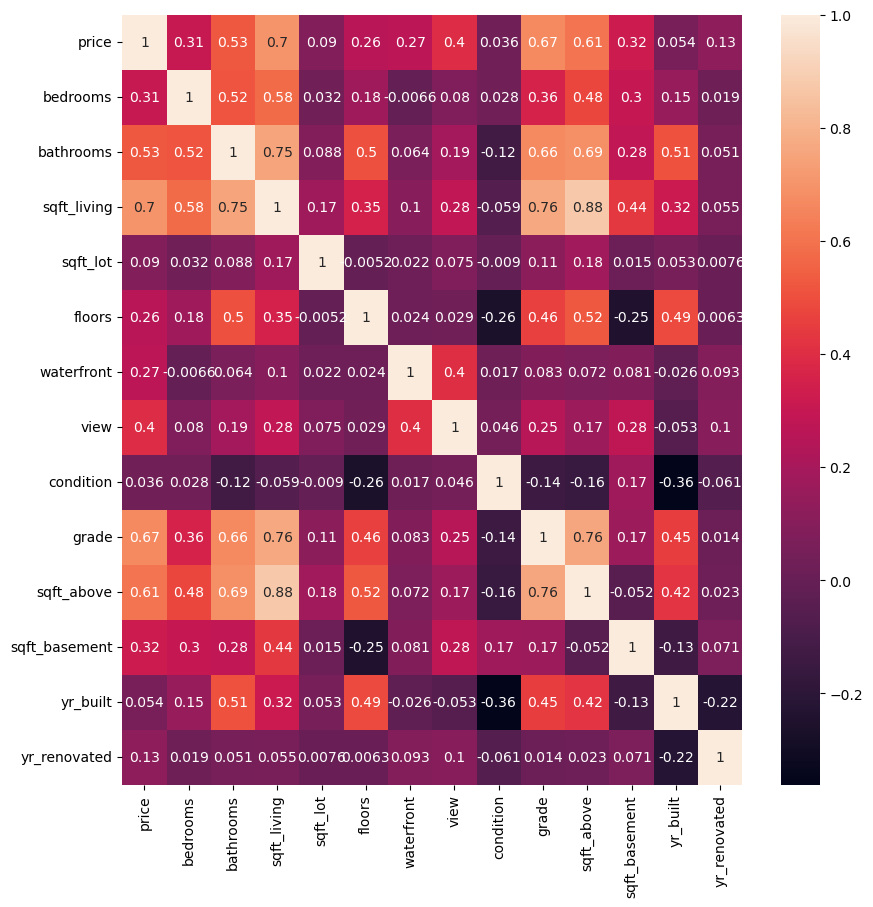

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

- Here our data is not highly correlated (because there are many entry gives negative correlation) but still for learning we use this dataset.

In [10]:
Y = dataset.iloc[:,0]
X = dataset.iloc[:,1:-1]


In [11]:
sc = StandardScaler()
sc.fit(X)
sc.transform(X)

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.73470764,
        -0.65868104, -0.54489777],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  0.46084084,
         0.2451414 , -0.6810785 ],
       [-1.47395936, -1.44746357, -1.42625404, ..., -1.22983377,
        -0.65868104, -1.29389179],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.92792759,
        -0.65868104,  1.29354209],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.22750526,
        -0.65868104,  1.12331618],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.92792759,
        -0.65868104,  1.25949691]])

In [12]:
X = pd.DataFrame(sc.transform(X),columns = X.columns)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Work as LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [17]:
lr.score(X_test,Y_test)*100

65.21998330335457

In [35]:
print(mean_squared_error(Y_test, lr.predict(X_test)))
print(mean_absolute_error(Y_test,lr.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test, lr.predict(X_test)))) # Root mean square error

52641191054.78373
143807.61611065295
229436.68201659413


In [18]:
lr.coef_

array([ -35805.23709802,   38368.18490952,   79713.78989555,
        -11471.68423604,   13736.05842527,   47814.38723395,
         35259.62867026,   10078.85819184,  144264.95911112,
         68461.19670765,   37327.69314301, -107834.6849141 ])

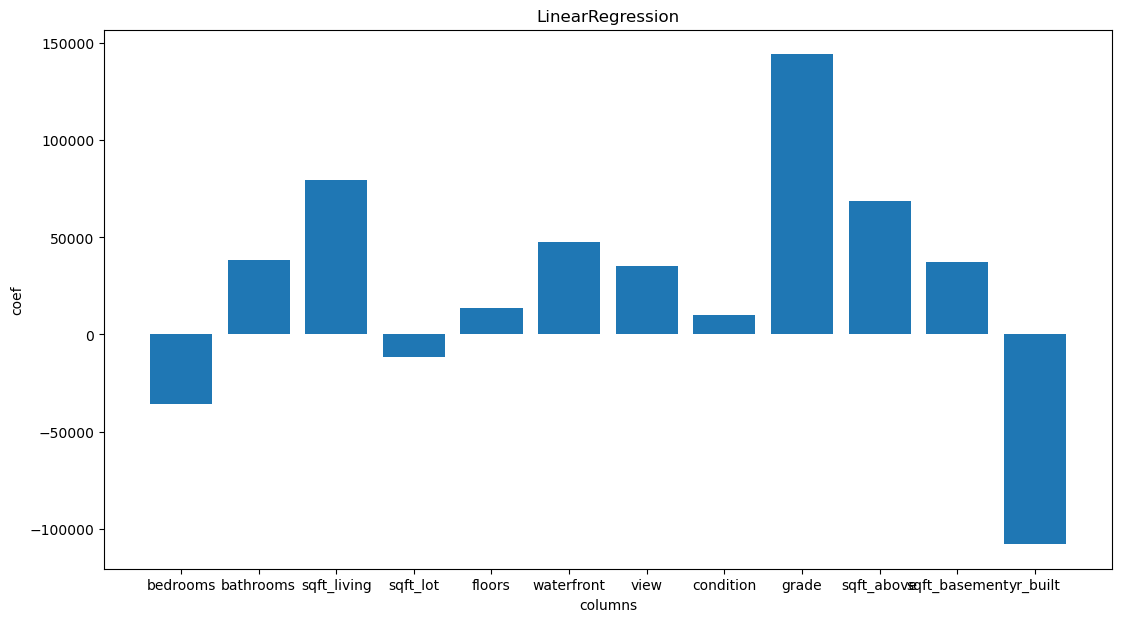

In [23]:
plt.figure(figsize=(13,7))
plt.bar(X.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Work as Lasso 

In [27]:
la = Lasso(alpha=0.01)
la.fit(X_train, Y_train)

C:\Users\Vaishnav\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.078e+13, tolerance: 2.262e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [28]:
la.score(X_test,Y_test)*100

65.21998356853425

In [36]:
print(mean_squared_error(Y_test, la.predict(X_test)))
print(mean_absolute_error(Y_test,la.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test, la.predict(X_test)))) # Root mean square error

52641190653.4218
143807.61614613456
229436.68114192595


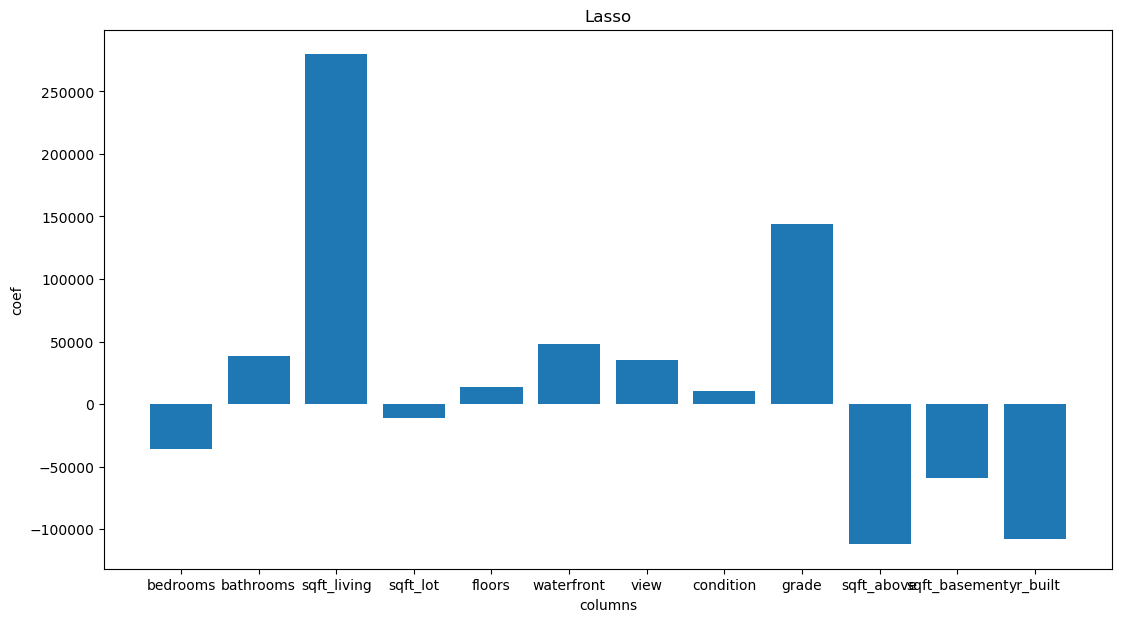

In [29]:
plt.figure(figsize=(13,7))
plt.bar(X.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Work as Ridge

In [30]:
ri = Ridge(alpha=10)
ri.fit(X_train,Y_train)

Ridge(alpha=10)

In [31]:
ri.score(X_test,Y_test)*100

65.21916886549941

In [37]:
print(mean_squared_error(Y_test, ri.predict(X_test)))
print(mean_absolute_error(Y_test,ri.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test, ri.predict(X_test)))) # Root mean square error

52642423744.782394
143791.070495861
229439.36834114234


- If compair LinearRegression, Lasso and Ridge , we got compairatively low error in Ridge. so we will use ridge regression here.

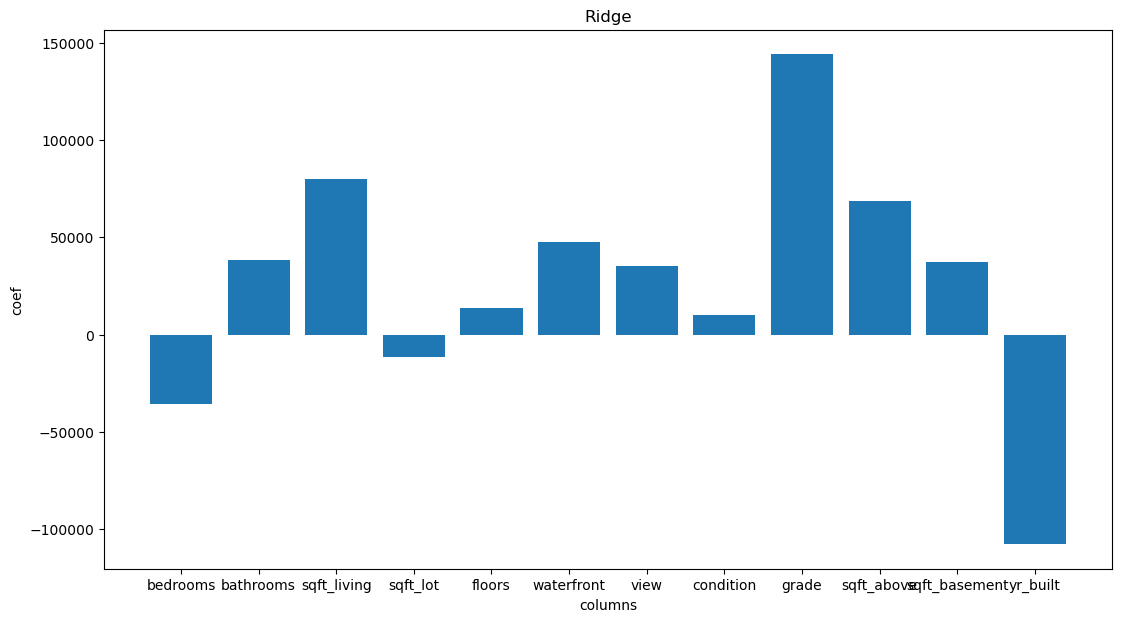

In [32]:
plt.figure(figsize=(13,7))
plt.bar(X.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [38]:
df = pd.DataFrame({"col_name":X.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [39]:
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-35805.237098,-35805.224189,-35741.799271
1,bathrooms,38368.184910,38368.118135,38337.247916
2,sqft_living,79713.789896,279902.136406,79719.094686
3,sqft_lot,-11471.684236,-11471.671138,-11454.233957
4,floors,13736.058425,13736.063979,13736.859894
5,waterfront,47814.387234,47814.380500,47788.992727
6,view,35259.628670,35259.624515,35294.171654
7,condition,10078.858192,10078.848241,10095.795559
8,grade,144264.959111,144264.961100,144099.470269
9,sqft_above,68461.196708,-112033.958884,68465.804341
